# Comp6481 / 8481 coursework 2024 

We will be working with data from https://www.kaggle.com/datasets/sethpoly/application-rejection-emails 

*Detect Reject Emails* by SethPoly@kaggle


**Detect Reject Emails Project**

This project uses data from [Kaggle's "Detect Reject Emails"](https://www.kaggle.com/datasets/sethpoly/application-rejection-emails) dataset, contributed by SethPoly.

### Dataset Overview

We are working with a dataset titled `Rejection Data - Sheet1.csv`, which contains emails with associated statuses indicating whether the email was a rejection email or not. Our task involves analyzing this data and implementing various NLP techniques.

### Project Structure

This notebook contains several tasks designed to extract insights from the email data, including calculating lexical richness, visualizing data, and training a Word2Vec model to identify similar tokens.

### Data Preparation

# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Used to detect the rejection emails from jobs applied to.


In [34]:
import numpy as np # linear algebra
import pandas as pd 
from gensim.models import Word2Vec
import nltk

df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [35]:
import string
import matplotlib.pyplot as plt
import nltk


# For the purposes of this assessment, all text processing actions in this cell have been removed except the replacement of newline characters by space characters

# convert email text to lowercase
#df.Email = df.Email.apply(lambda x: x.lower())
# remove punctuation
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
# remove numbers
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))
# remove newline tags
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


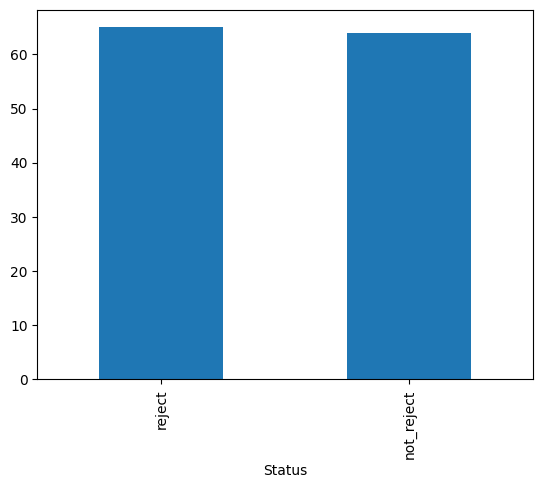

In [36]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [38]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [39]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report

# pull data into vectors to create collection of text/tokens
#vectorizer = CountVectorizer()
#x = vectorizer.fit_transform(df.Email)

#encoder = LabelEncoder()
#y = encoder.fit_transform(df.Status)

# split into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of sets
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

In [40]:
#%%time
#nb = MultinomialNB()
#nb.fit(x_train, y_train)

In [41]:
#def predict_reject(email):
#    category_names = {'reject':'reject','not_reject':'not-reject'}
#    cod = nb.predict(vectorizer.transform([email]))
#    return category_names[encoder.inverse_transform(cod)[0]]

#print(predict_reject('Unfortunately we will not be moving forward'))
#print(predict_reject('I found some job listings you may be interested in'))
#print(predict_reject('We were very fortunate to have a strong group of applicants to consider for this role and have recently filled this position. Unfortunately, because this role is no longer available, we will not be moving forward with your application.'))
#print(predict_reject(''))


In [42]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

# Init the classfifier
#clf = OneVsRestClassifier(LogisticRegression())

# Fit classifier to training data
#clf.fit(x_train, y_train)

# Print accuracy
#print(f'Accuracy: {clf.score(x_test, y_test)}')

In [43]:
#x_test_clv_pred = clf.predict(x_test)
#confusion_matrix(y_test, x_test_clv_pred)
#print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

 - Inspiration and code samples from https://towardsdatascience.com/i-built-a-reject-not-reject-email-classifier-for-my-job-applications-844a3b6cd67e

**************************************************************************************
* End of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
**************************************************************************************


### Task 1: Adding Token Length Column

Here, we add a new column `Length` to the DataFrame, which stores the number of tokens (words) in each email.

In [44]:
# Answer to Q1
df['Length'] = df['Tokens'].apply(len)

In [45]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['Length'])

0       39
1       47
2      139
3       49
4       81
      ... 
124    133
125     87
126     58
127     34
128    146
Name: Length, Length: 129, dtype: int64


### Task 2: Visualizing Email Length by Status

In this task, we visualize the average length of rejection and non-rejection emails using a bar plot.

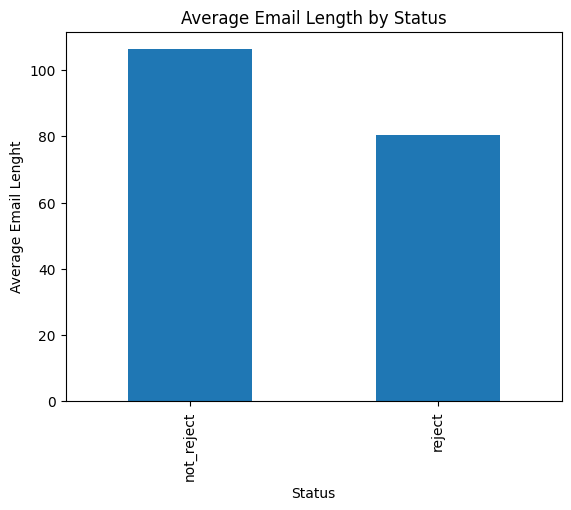

In [46]:
# Answer to Q2a
df.groupby('Status')['Length'].mean().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Average Email Lenght')
plt.title('Average Email Length by Status')
plt.show()

### Task 3: Calculating Lexical Richness

Lexical richness is defined as the number of unique tokens divided by the total number of tokens in the email. We add a new column `LexRich` to store this value.

In [47]:
# Answer for Q3
df['LexRich'] = len(set(df.Email))/len(df.Email)

In [48]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['LexRich'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
124    1.0
125    1.0
126    1.0
127    1.0
128    1.0
Name: LexRich, Length: 129, dtype: float64


### Task 4: Lexical Richness Analysis

We calculate the average lexical richness for both rejection and non-rejection emails.


In [49]:
# We can access all the data in df with the Status = 'reject', using this code:
# print(df[df.Status=='reject'])
# print(df[df.Status=='not_reject'])


In [50]:
# Answer for Q4a
reject_status = df[df.Status=='reject']
non_reject_status = df[df.Status=='not_reject']

lex_reject = len(set(reject_status)) / len(reject_status)
lex_not_reject = len(set(non_reject_status)) / len(non_reject_status)


In [51]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(lex_reject)
print(lex_not_reject)

0.07692307692307693
0.078125


### Task 5: Word2Vec Model

We train a Word2Vec model on the tokenized email data to find the top 20 most similar tokens to the token "developer."

In [52]:
# Answer to Q5 
model = Word2Vec(sentences=df.Tokens, vector_size=100, window=5, min_count=1, workers=4)


In [53]:
similar = model.wv.most_similar('developer', topn=20)
for sim in similar:
    print(sim)

('1', 0.9166291952133179)
('want', 0.9135057926177979)
('move', 0.9121819138526917)
('visit', 0.9112978577613831)
('reviewed', 0.911025881767273)
('any', 0.9108964800834656)
('ago', 0.9105902910232544)
('been', 0.9105844497680664)
('but', 0.9103046655654907)
('clients', 0.9102919101715088)
('what', 0.9101693630218506)
('consider', 0.910045862197876)
('experience', 0.9098115563392639)
('also', 0.9096801280975342)
('one', 0.9096653461456299)
('position', 0.9096507430076599)
('success', 0.9095509052276611)
('fit', 0.9095226526260376)
('how', 0.9095192551612854)
('interest', 0.9094806909561157)


In [54]:
# Sentiment Analysis 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/wyt/ue34/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Part B

Identifying the sentiment score of each email

In [55]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialising the VADER sentiment analyser 
sid = SentimentIntensityAnalyzer()


# Perfoming sentiment analysis on each email and storing the sentiment score
df['Sentiment'] = df['Email'].apply(lambda x: sid.polarity_scores(x)['compound'])


### Performing sentitment analysis on the email dataset

In [56]:
# Print the first few rows of the DataFrame with the sentiment scores
print(df[['Email', 'Sentiment']])

                                                 Email  Sentiment
0    Thank you for applying to the Junior Software ...     0.0258
1    Thank you for your interest in the Train To Hi...     0.8885
2    eth,   Thank you for your interest in Exyn and...     0.9892
3    Thank you for your interest in the Software En...     0.8885
4    Hi Seth,  Thank you for your interest in PathA...     0.9747
..                                                 ...        ...
124   Starting March 17, 2021, eBay will no longer ...     0.3612
125  Hi Seth,  I want to make finding a great remot...     0.9848
126  Hello Seth,  I just wanted to take a second to...     0.8557
127  Your free YouMail plan includes 20 in-app tran...     0.5106
128   Support resources for developers at all level...     0.9715

[129 rows x 2 columns]


Finding out what email is the most positive and negative in the dataset

In [57]:
# Finding the most positive email
most_positive_email = df.loc[df['Sentiment'].idxmax(), 'Email']

# Finding the most negative email
most_negative_email = df.loc[df['Sentiment'].idxmin(), 'Email']

In [ ]:
print("Most negative email: ", most_negative_email)
print("Most positive email: ", most_positive_email)

Most negative email:  Unfortunately, SoftSages Technology Inc has decided not to move forward with your Software Developer - entry level application at this time. 
Most positive email:  Hi Seth,  I found a job you may be interested in: 100% REMOTE - Senior Fullstack Engineer  If you'd like to apply, let me know in a quick response with your updated resume. Full job details below.  f you are a Senior Software Engineer with Python and React experience, please read on!  We headquartered in San Francisco, CA area and we are a cutting-edge fintech company that has a passion for helping people. We are revolutionizing an industry that is one of the fastest growing in healthcare! We provide financing solutions and options for people that are looking to advance their lives. We look to take the burden off families during an already stressful process so that they can enjoy the overall process they will be going through. We have only been in business a short time, but are growing very rapidly and 

####  Scores
Scores close to -1 indicate a very negative sentiment and 1 indicates a positive one, 0 means neutral

### Word Frequency Analysis

In [58]:
# Tokenizing and preprocesing 

rejection_tokens = [word for email in df[df['Status'] == 'reject']['Tokens'] for word in email]
non_rejection_tokens = [word for email in df[df['Status'] == 'not_reject']['Tokens'] for word in email]

In [59]:
# Calculate Word Frequencies
rejection_word_freq = pd.Series(rejection_tokens).value_counts()
non_rejection_word_freq = pd.Series(non_rejection_tokens).value_counts()

In [60]:
print(rejection_word_freq)
print(non_rejection_word_freq)

.            236
,            230
your         190
you          179
to           170
            ... 
opted          1
aligns         1
fits           1
regularly      1
AI-first       1
Name: count, Length: 803, dtype: int64
.             275
,             264
to            180
you           173
your          155
             ... 
renew           1
full-price      1
Two-Day         1
Shipping        1
wait            1
Name: count, Length: 1807, dtype: int64


In [61]:
# Visualizing the Results
def plot_word_frequency(word_freq, title):
    word_freq[:20].plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

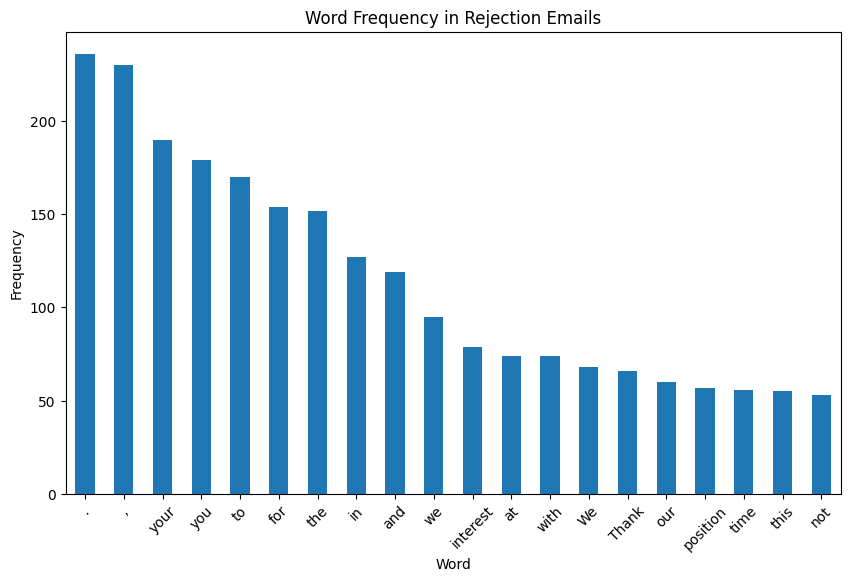

In [62]:
# Chart of word frequency for rejection emails
plot_word_frequency(rejection_word_freq, 'Word Frequency in Rejection Emails')

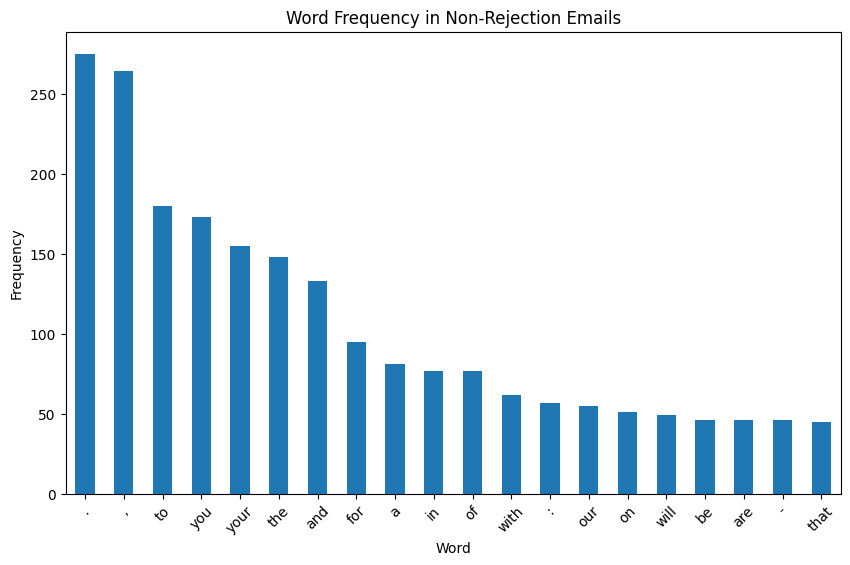

In [63]:
# Chart of word frequency for non-rejection emails
plot_word_frequency(non_rejection_word_freq, 'Word Frequency in Non-Rejection Emails')